# Ejercicio propuesto 7. Deducción del rotacional en coordenadas esféricas

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Diego Andrés Alvarez, <daalvarez@unal.edu.co>  | Octubre 3, 2023      | Primer código |

In [1]:
from sympy import init_printing, latex, symbols, sin, cos, diff, simplify, Function, Matrix, expand, trigsimp
import sympy as sp

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

In [2]:
r, t, p = symbols('r, theta, phi')

x = r*sin(t)*cos(p)
y = r*sin(t)*sin(p)
z = r*cos(t)

J = Matrix([[ diff(x,r), diff(x,t), diff(x,p) ],
            [ diff(y,r), diff(y,t), diff(y,p) ],
            [ diff(z,r), diff(z,t), diff(z,p) ]])

De acuerdo al [teorema de la función inversa](https://es.wikipedia.org/wiki/Matriz_y_determinante_jacobianos), la matriz inversa de la matriz Jacobiana de una función invertible es la matriz Jacobiana de la función inversa:

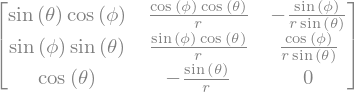

In [3]:
JinvT = trigsimp(J.inv()).T
JinvT

In [5]:
dr_dx, dt_dx, dp_dx = JinvT[0,:]
dr_dy, dt_dy, dp_dy = JinvT[1,:]
dr_dz, dt_dz, dp_dz = JinvT[2,:]

# se definen las primeras derivadas utilizando la regla de la cadena
d_dx = lambda f: diff(f,r)*dr_dx + diff(f,t)*dt_dx + diff(f,p)*dp_dx
d_dy = lambda f: diff(f,r)*dr_dy + diff(f,t)*dt_dy + diff(f,p)*dp_dy
d_dz = lambda f: diff(f,r)*dr_dz + diff(f,t)*dt_dz + diff(f,p)*dp_dz

In [6]:
# se especifica que fr, ft y fp son funciones de r, t y p
fr = Function('f_r')(r, t, p)
ft = Function('f_θ')(r, t, p)
fp = Function('f_ϕ')(r, t, p)

In [7]:
# Matriz de transformación de la base {r,t,p} a la base {i,j,k}
T = Matrix([[ sin(t)*cos(p),  cos(t)*cos(p),  -sin(p) ],     
            [ sin(t)*sin(p),  cos(t)*sin(p),   cos(p) ],      
            [        cos(t),        -sin(t),        0 ]])

In [8]:
# campo vectorial en coordenadas esféricas (con respecto a la base {r,t,p})
f_esf = Matrix([ fr,     
                 ft,      
                 fp  ])

In [9]:
# se convierte el campo vectorial f_esf a su correspondiente en coordenadas rectangulares
# (con respecto a la base {i,j,k})
f_rec = T * f_esf

In [10]:
# se extraen las componentes de f_rec
fx, fy, fz = f_rec

In [11]:
# se especifica el rotacional en coordenadas rectangulares
rot_f_ijk = trigsimp(Matrix([[ d_dy(fz) - d_dz(fy) ],
                             [ d_dz(fx) - d_dx(fz) ],
                             [ d_dx(fy) - d_dy(fx) ]]))

Se imprime el rotacional en coordenadas cilíndricas con respecto a la base $\{\hat{\boldsymbol{i}}, \hat{\boldsymbol{j}}, \hat{\boldsymbol{k}}\}$:

In [12]:
imprimir(r"\boldsymbol{\nabla} \times \phi = ", rot_f_ijk)

<IPython.core.display.Math object>

Se imprime el rotacional en coordenadas esféricas con respecto a la base $\{\hat{\boldsymbol{r}}, \hat{\boldsymbol{\theta}}, \hat{\boldsymbol{\phi}}\}$:

In [13]:
rot_f_rtp = expand(trigsimp(T.T * rot_f_ijk))

imprimir(r"\boldsymbol{\nabla} \times \phi(r, \theta, \phi) = ", rot_f_rtp)

<IPython.core.display.Math object>

Versión que figura en Wikipedia https://en.wikipedia.org/wiki/Spherical_coordinate_system:

In [14]:
rot_f_rtp2 = Matrix([[ (1/(r*sin(t)))*(diff(fp*sin(t), t) - diff(ft, p)) ],
                     [ (1/r)*((1/sin(t))*diff(fr, p) - diff(r*fp, r))    ],
                     [ (1/r)*(diff(r*ft, r) - diff(fr, t))               ]])

rot_f_rtp2 = expand(trigsimp(rot_f_rtp2))

imprimir(r"\boldsymbol{\nabla} \times \phi(r, \theta, \phi) = ", rot_f_rtp2)

<IPython.core.display.Math object>

In [15]:
trigsimp(rot_f_rtp - rot_f_rtp2)